<a href="https://colab.research.google.com/github/wzinkann/wzinkann/blob/main/Fantasy_Football_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4: New Topic (Scraping web data with Beautiful Soup)
## Will Zinkann
### 04/21/2021

## For my new topic I decided to learn how to scrape web data using Beautiful Soup. During this semeseter we have been provided with nice datasets to run evaluations on, I wanted to learn a practial approach on obtaining similar data collections. For my homework I decided to focus on one of my hobbies, NFL football, and more particularly collecting player data. The source of all of my data is from the phenominal website ProFootballReference and my scaping techniques are from following a tutorial from https://stmorse.github.io/journal/pfr-scrape-python.html.

## It is very easy to read an entire players stats into a pandas dataframe, using 'pd.read_html' this was incredibly suprising to me as it could be done in three short lines. But for this data to be brought into python, the individual players stat pages must be the url that is being scraped. This is obviously quite tedious, but potentially valuable if one player was being intensely examined. However, it is a great place to start this web scraping journey, in the cell below, I collected the data for Tom Brady and put it in my 'brady_df' pandas dataframe.

# Tutorial

In [ ]:
import pandas as pd
url = 'https://www.pro-football-reference.com/players/B/BradTo00.htm'
brady_df = pd.read_html(url)[0]
brady_df

,Year,Age,Tm,Pos,No.,G,GS,QBrec,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,1D,Lng,Y/A,AY/A,Y/C,Y/G,Rate,QBR,Sk,Yds.1,NY/A,ANY/A,Sk%,4QC,GWD,AV
0,2000,23,NWE,NaN,12.0,1,0,NaN,1,3,33.3,6,0,0.0,0,0.0,NaN,6,2.0,2.0,6.0,6.0,42.4,NaN,0,0,2.00,2.00,0.0,NaN,NaN,0
1,2001*,24,NWE,QB,12.0,15,14,11-3-0,264,413,63.9,2843,18,4.4,12,2.9,145.0,91,6.9,6.4,10.8,189.5,86.5,NaN,41,216,5.79,5.39,9.0,3.0,3.0,12
2,2002,25,NWE,QB,12.0,16,16,9-7-0,373,601,62.1,3764,28,4.7,14,2.3,185.0,49,6.3,6.1,10.1,235.3,85.7,NaN,31,190,5.66,5.54,4.9,2.0,3.0,13
3,2003,26,NWE,QB,12.0,16,16,14-2-0,317,527,60.2,3620,23,4.4,12,2.3,175.0,82,6.9,6.7,11.4,226.3,85.9,NaN,32,219,6.08,5.94,5.7,3.0,5.0,11
4,2004*,27,NWE,QB,12.0,16,16,14-2-0,288,474,60.8,3692,28,5.9,14,3.0,187.0,50,7.8,7.6,12.8,230.8,92.6,NaN,26,162,7.06,6.92,5.2,0.0,1.0,15
5,2005*,28,NWE,QB,12.0,16,16,10-6-0,334,530,63.0,4110,26,4.9,14,2.6,197.0,71,7.8,7.5,12.3,256.9,92.3,NaN,26,188,7.05,6.86,4.7,3.0,4.0,15
6,2006,29,NWE,QB,12.0,16,16,12-4-0,319,516,61.8,3529,24,4.7,12,2.3,176.0,62,6.8,6.7,11.1,220.6,87.9,68.6,26,175,6.19,6.08,4.8,2.0,2.0,14
7,2007*+,30,NWE,QB,12.0,16,16,16-0-0,398,578,68.9,4806,50,8.7,8,1.4,240.0,69,8.3,9.4,12.1,300.4,117.2,87.0,21,128,7.81,8.88,3.5,4.0,4.0,24
8,2008,31,NWE,NaN,12.0,1,1,1-0-0,7,11,63.6,76,0,0.0,0,0.0,3.0,26,6.9,6.9,10.9,76.0,83.9,59.5,0,0,6.91,6.91,0.0,NaN,NaN,0
9,2009*,32,NWE,QB,12.0,16,16,10-6-0,371,565,65.7,4398,28,5.0,13,2.3,215.0,81,7.8,7.7,11.9,274.9,96.2,74.1,16,86,7.42,7.38,2.8,1.0,1.0,16


## As you can see my DataFrame now includes the stats for every NFL season Tom Brady has played in and also 3 extra rows containing his averages for his carrer, last 20 years and last year of action. 
## 'read_html' does this by returns a list of all the `<`table`>` objects on the page, in a pandas DataFrame form. If I knew more about HTML and website metadata I would be able to explain more about the `<`table`>`'s being collected, but for now I am just going to reap the benefits of convenient web development.

## For me one of the best parts about the NFL is fantasy football, for those unfamiliar, each leauge is comprised of individual users who each have their own roster of real life NFL players that they picked in the draft. Then week by week each individual player is assesed on their performance and recieve points based on their gameday performance (ie. scoring a touchdown, or running for many yards). If your fake team of players out-scores your opponent's then you win. 
## Since every player in the NFL can be completely de-humanized and turned into numbers in a data set, analyzing fantasy football trends is a great way to get a leg up on opposing users in your leauge. 
## This is where scraping web data comes into play. Aforementioned ProFootballReference has a large section of their website dedicated to fantasy football. Below is code that is used to scrape individual player data in order to compare players to see who were the most standout players in the 2020 season. 

In [ ]:
from bs4 import BeautifulSoup
import requests

url = 'https://www.pro-football-reference.com'
year = 2020

r = requests.get(url + '/years/' + str(year) + '/fantasy.htm')
soup = BeautifulSoup(r.content, 'html.parser')
parsed_table = soup.find_all('table')[0]

## The most valueable piece of code in this block is the 'requests.get' this allows us to grab the raw HTML, then utilize BeautifulSoup to crawl through the 'Name' column of the table, recording things like the hyperlink as we go storing the raw HTML in 'parsed_table' 

## This raw HTML is unreadable for humans, so to see individual player stats, we can interate through the rows of the table, grabbing the player name entry (conveniently labeled with data-stat="player") and extracting parts that we want.
## Below is a large section of copied code, this code uses clever try and catch blocks in order to take the first 300 (denoted by the maxp amount) rows of players and neatly list out their games and Fantasy Points per game sorted by amount of fantasy points, for example rows 0-15 are all 16 of Derek Henry's (who led the leauge in fantasy points) regular season games sorted by date, rows 16-31 are Alvin Kamara's (2nd in 2020 total fantasy points) and so on. Since this file is large and takes a minute or so to gather, it is saved to a CSV.

In [ ]:
maxp=300
df=[]

# first 2 rows are col headers
for i,row in enumerate(parsed_table.find_all('tr')[2:]):
    if i % 10 == 0: print(i, end=' ')
    if i >= maxp: 
        print('\nComplete.')
        break
        
    try:
        dat = row.find('td', attrs={'data-stat': 'player'})
        name = dat.a.get_text()
        stub = dat.a.get('href')
        stub = stub[:-4] + '/fantasy/' + str(year)
        pos = row.find('td', attrs={'data-stat': 'fantasy_pos'}).get_text()

        # grab this players stats
        tdf = pd.read_html(url + stub)[0]    

        # get rid of MultiIndex, just keep last row
        tdf.columns = tdf.columns.get_level_values(-1)

        # fix the away/home column
        tdf = tdf.rename(columns={'Unnamed: 4_level_2': 'Away'})
        tdf['Away'] = [1 if r=='@' else 0 for r in tdf['Away']]

        # drop all intermediate stats
        tdf = tdf.iloc[:,[1,2,3,4,5,-3]]
        
        # drop "Total" row
        tdf = tdf.query('Date != "Total"')
        
        # add other info
        tdf['Name'] = name
        tdf['Position'] = pos
        tdf['Season'] = year

        df.append(tdf)
    except:
        pass
    
df = pd.concat(df)
df.to_csv('fantasy2020.csv')
df.head()

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 
Complete.


,G#,Date,Tm,Away,Opp,FantPt,Name,Position,Season
0,1.0,2020-09-14,TEN,1,DEN,13.1,Derrick Henry,RB,2020
1,2.0,2020-09-20,TEN,0,JAX,8.4,Derrick Henry,RB,2020
2,3.0,2020-09-27,TEN,1,MIN,25.0,Derrick Henry,RB,2020
3,4.0,2020-10-13,TEN,0,BUF,18.3,Derrick Henry,RB,2020
4,5.0,2020-10-18,TEN,0,HOU,38.4,Derrick Henry,RB,2020


## From here graphs can  be displayed, for example, here is the average points per game and the varience. This can make it very easy to see the outliers in the data. There is at least one major outlier in each of the 4 positions that were chose to be analyzed (QB, RB, WR and TE). 

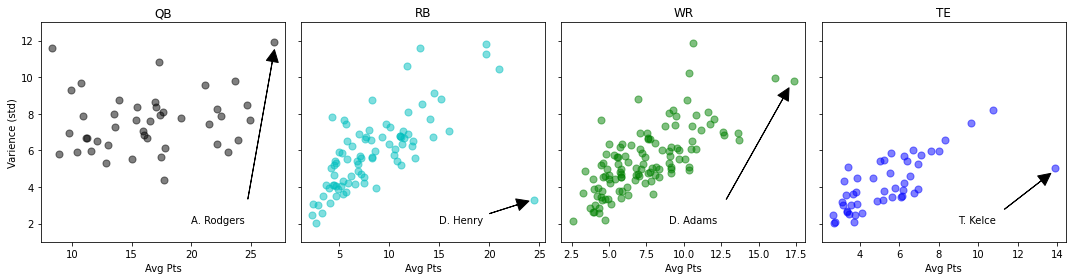

In [ ]:
import matplotlib.pyplot as plt

pd.read_csv('fantasy2020.csv')

fig, ax = plt.subplots(1,4, sharey=True, figsize=(15,4))

cols = ['k', 'c', 'g', 'b']

for i, pos in enumerate(["QB", "RB", "WR", "TE"]):
    t = (df
     .query('Position == @pos')
     .groupby('Name')
     .agg({'FantPt': ['mean', 'std'],
           'Position': 'min'}))
    ax[i].scatter(t[('FantPt','mean')], t[('FantPt', 'std')],
                  c=cols[i], s=50, alpha=0.5, label=pos)
    ax[i].set(xlabel='Avg Pts', title=pos)
    ax[0].set(ylabel = 'Varience (std)')

# label some outliers
ax[0].annotate('A. Rodgers', xy=(27.2, 12.3), xytext=(20, 2),
                arrowprops={'facecolor':'black', 'width':0.1, 'shrink':0.08})
ax[1].annotate('D. Henry', xy=(24.36, 3.3), xytext=(15, 2),
                arrowprops={'facecolor':'black', 'width':0.1, 'shrink':0.08})
ax[2].annotate('D. Adams', xy=(17.57, 10.2), xytext=(9, 2),
                arrowprops={'facecolor':'black', 'width':0.1, 'shrink':0.1})
ax[3].annotate('T. Kelce', xy=(13.97, 5), xytext=(9, 2),
                arrowprops={'facecolor':'black', 'width':0.1, 'shrink':0.1})
    
ax[0].set(ylim=[1,13])
plt.tight_layout()

plt.show()

# Challenge

### For The challenge I decided to calculated the amount of fantasy point production between all of the different teams on the two most important positions RB and WR. 

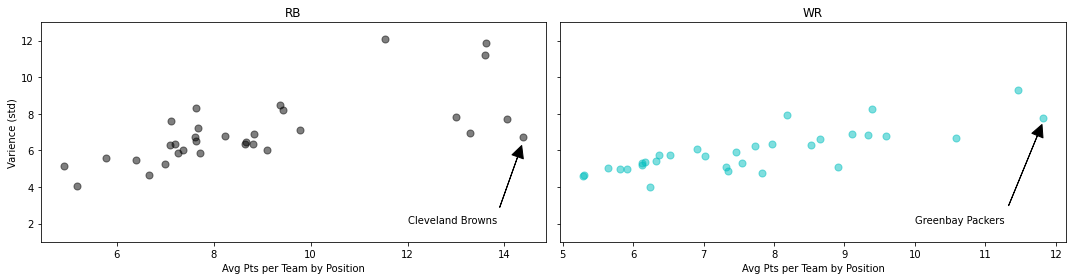

In [ ]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,4))

cols = ['k', 'c']

for i, pos in enumerate(["RB","WR"]):
    t = (df
     .query('Position == @pos')
     .groupby('Tm')
     .agg({'FantPt': ['mean', 'std'],
           'Position': 'min'}))
    ax[i].scatter(t[('FantPt','mean')], t[('FantPt', 'std')],
                  c=cols[i], s=50, alpha=0.5, label=pos)
    ax[i].set(xlabel='Avg Pts per Team by Position', title=pos)
    ax[0].set(ylabel = 'Varience (std)')

ax[0].annotate('Cleveland Browns', xy=(14.4, 6.6), xytext=(12, 2),
            arrowprops={'facecolor':'black', 'width':0.1, 'shrink':0.08})
ax[1].annotate('Greenbay Packers', xy=(11.85, 7.85), xytext=(10, 2),
            arrowprops={'facecolor':'black', 'width':0.1, 'shrink':0.08})


    
ax[0].set(ylim=[1,13])
plt.tight_layout()

plt.show()

# Questions

## 1) What are some further implications with this?
## Using all of the data collected, it is possible for me to design a fantasy football draft prediction model using any type of classifier we have learned in class. Doing some quick research I think that this would be possible by using comparing the stats collected from the 2019 and 2020 seasons and comparing players to their Average Draft Positions (ADP). This could help quantify the reasons players were drafted higher than their value and lower than their values. 

## 2) How could a machine learning model be implemented?
## One way this could be done would be by looking at fantasy points projections for the 2020 season. Many different factors aside from the stats can be implemented into this algorithm inculding, team quality, home vs away, or even the weather of some games. One thing I do think that the model would struggle with would be player injuries.

## 3) What type of machine learning model would work best for this?
## I think this would be well fit for random forest classification. This is because it searches for the best feature among a random subset of features and there are many different features that contribute to a successful fantasy football season.

## 4) What is the difference between web scraping and web crawling?
## Web crawling creates a copy of what’s on the site and web scraping extracts specific data for analysis. However, in order to web scrape a small amount of web crawling must be done in order to find the necessary information. Web crawling can be much more complicated than web scraping and is gereally done by large companies in order to search beyond a websites surface level. While a good example was what was done in this exercise, in order to gather very specific data, in our case number values.

## 5) What are some other implications of web scraping?
## There are endless possibilities that can be done with web scraping, mostly having to do with data collection. Data can be collected in all sectors of the internet, such as gathering tweets or comparing prices of different products. 